In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('auto1.csv')
df.head()

,name,mpg,cylinders,displacement,horsepower
0,chevrolet chevelle malibu,18,8,307.0,130
1,buick skylark 320,15,8,350.0,165
2,plymouth satellite,18,8,318.0,150
3,amc rebel sst,16,8,304.0,150
4,ford torino,17,8,302.0,140


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          100 non-null    object 
 1   mpg           100 non-null    int64  
 2   cylinders     100 non-null    int64  
 3   displacement  100 non-null    float64
 4   horsepower    100 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 4.0+ KB


In [4]:
df.drop(['name'],axis=1,inplace=True)

<Axes: >

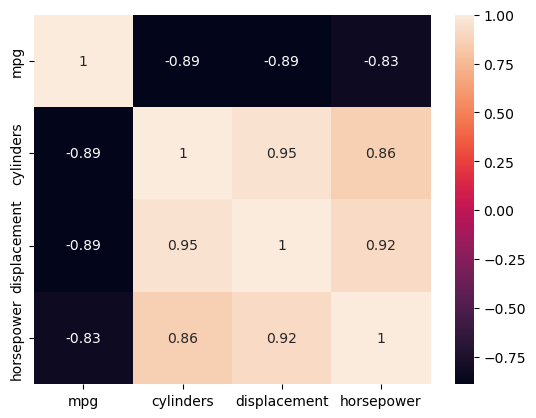

In [5]:
sns.heatmap(df.corr(),annot=True)

In [6]:
X=df.iloc[:,:-1]
X

,mpg,cylinders,displacement
0,18,8,307.0
1,15,8,350.0
2,18,8,318.0
3,16,8,304.0
4,17,8,302.0
...,...,...,...
95,13,8,360.0
96,18,6,225.0
97,16,6,250.0
98,18,6,232.0


In [7]:
y=df.iloc[:,-1]
y

0     130
1     165
2     150
3     150
4     140
     ... 
95    175
96    105
97    100
98    100
99     88
Name: horsepower, Length: 100, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=123)

In [9]:
X_train.shape,y_train.shape

((80, 3), (80,))

In [10]:
X_test.shape,y_test.shape

((20, 3), (20,))

In [11]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [14]:
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)

In [15]:
from sklearn.metrics import mean_squared_error,r2_score

In [16]:
def mer(y_actual,y_pred):
    print("RMSE:-",round(np.sqrt(mean_squared_error(y_actual,y_pred)),2))
    print("R2 score:-",round(r2_score(y_actual,y_pred),2))

In [17]:
print("Train Data")
mer(y_train,y_train_pred)
print("Test Data")
mer(y_test,y_test_pred)

Train Data
RMSE:- 18.85
R2 score:- 0.84
Test Data
RMSE:- 17.92
R2 score:- 0.84


In [18]:
model.predict(sc.transform([[18,8,307.0]]))

array([158.38767562])

In [19]:
model.intercept_

130.3625

In [20]:
model.coef_

array([ 1.81332104, -1.24978222, 46.72132936])

In [21]:
import pickle
file=open("a_model","wb")
pickle.dump(model,file)